# 3. Polynomial Regression


### 공부시간에 따른 시험점수(우등생)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../dataset/PolynomialRegressionData.csv')

In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### 3-1 단순선형회귀(SLR)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y) # 전체데이터 학습


LinearRegression()

### 데이터 시각화(전체)

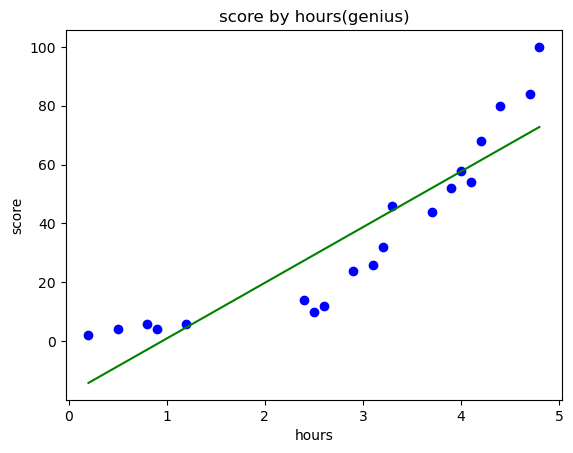

In [10]:
plt.scatter(X,y, color='blue') #산점도
plt.plot(X, reg.predict(X), color='green')
plt.title('score by hours(genius)') #제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [11]:
#전체데이터를 통한 모델 평가
reg.score(X,y)

0.8169296513411765

### 3-2 다항회귀(Polynomial Regression)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
#x^0, #x^1, #x^2 (degree값이 2일때)
poly_reg = PolynomialFeatures(degree=4) #2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5]



array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [26]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # 변환된 X와 y를 가지고 모델 생성(학습)

LinearRegression()

### 데이터시각화 (변환된 X와 y)

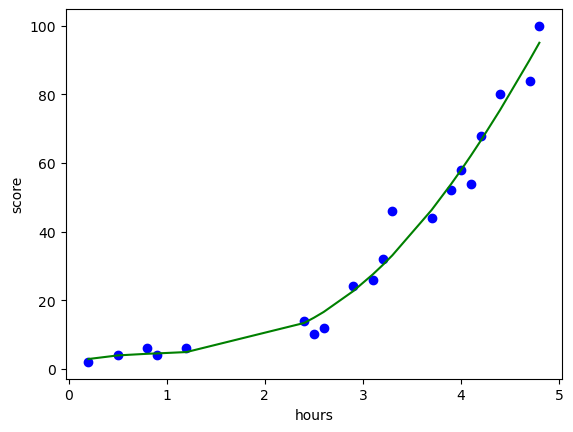

In [28]:
plt.scatter(X,y, color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)), 
         color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [29]:
#numpy의 도움을 받아 x축을 조금더 부드럽게 만들어보자!
X_range=np.arange(min(X),max(X),0.1) #x의최소값에서 최대값까지범위를 0.1단위로 데이터생성

In [30]:
X_range.shape

#형변환(reshape(row갯수,column갯수))
X_range = X_range.reshape(-1,1) #row개수 자동계산, 컬럼개수는 1개
X_range.shape


(46, 1)

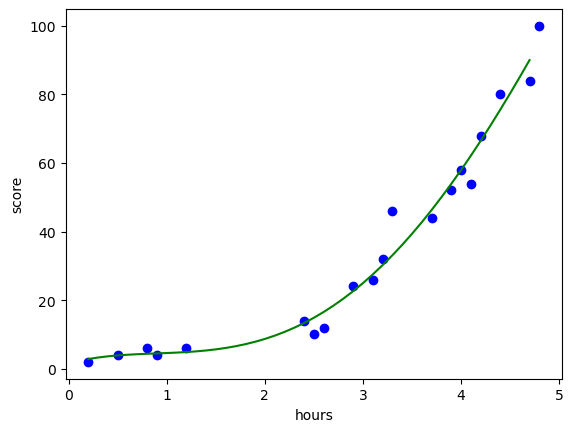

In [43]:
plt.scatter(X,y, color='blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)), 
         color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부시간에 따른 시험 성적 예측

In [38]:
reg.predict([[2]]) #2시간을 공부했을떄 점수 예측


array([19.85348988])

In [42]:
#2시간을 공부했을 때 선형 회귀 모델의 예측
lin_reg.predict(poly_reg.fit_transform([[2]]))

array([8.70559135])

In [44]:
lin_reg.score(X_poly,y)

0.9782775579000046

# ending